In [1]:
#importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats
from haversine import haversine, Unit
from scipy.stats import skew, kurtosis
sns.set() 
%matplotlib inline

In [2]:
# Importing the provided dataset from the data folder.
df = pd.read_csv('nyc_taxi_trip_duration Dataset.csv')

In [3]:
df=df[df.trip_duration!=df.trip_duration.max()]
df=df[df.trip_duration!=df.trip_duration.min()]

In [4]:
df['trip_duration_hour']=df['trip_duration']/3600

In [5]:
df.passenger_count.value_counts()

1    517403
2    105096
5     38926
3     29692
6     24107
4     14050
0        32
7         1
9         1
Name: passenger_count, dtype: int64

In [6]:
df=df[df.passenger_count<=6]
df=df[df.passenger_count!=0]

In [7]:
# Changing the pickup_datetime and dropoff_datetime from object to datetime datatype
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime']=pd.to_datetime(df['dropoff_datetime'])

In [8]:
# Creating features based on month
df['pickup_by_month'] = df['pickup_datetime'].dt.month
df['dropoff_by_month'] = df['dropoff_datetime'].dt.month

In [9]:
# Creating features based on month
df['pickup_by_month'] = df['pickup_datetime'].dt.month
df['dropoff_by_month'] = df['dropoff_datetime'].dt.month

In [10]:
df['pickup_day']=df['pickup_datetime'].dt.day
df['dropoff_day']=df['dropoff_datetime'].dt.day
df['pickup_month']=df['pickup_datetime'].dt.month
df['dropoff_month']=df['dropoff_datetime'].dt.month

In [11]:
print(df[df.dropoff_month==7].pickup_datetime.dt.month.value_counts())
print(df[df.dropoff_month==7].pickup_datetime.dt.day.value_counts())

6    53
Name: pickup_datetime, dtype: int64
30    53
Name: pickup_datetime, dtype: int64


In [12]:
type_dummy=pd.get_dummies(df.store_and_fwd_flag, prefix='store_and_fwd_flag')

In [13]:
df=pd.concat([df,type_dummy],axis=1)

In [15]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_duration_hour,pickup_by_month,dropoff_by_month,pickup_day,dropoff_day,pickup_month,dropoff_month,store_and_fwd_flag_N,store_and_fwd_flag_Y
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,0.111111,2,2,29,29,2,2,1,0
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,0.305556,3,3,11,11,3,3,1,0
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,0.454167,2,2,21,21,2,2,1,0
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,0.316944,1,1,5,5,1,1,1,0
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,0.235556,2,2,17,17,2,2,1,0


In [16]:
df=df.drop(['id', 'pickup_datetime', 'dropoff_datetime', 'store_and_fwd_flag'],axis=1)

In [17]:
df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,trip_duration_hour,pickup_by_month,dropoff_by_month,pickup_day,dropoff_day,pickup_month,dropoff_month,store_and_fwd_flag_N,store_and_fwd_flag_Y
0,2,1,-73.953918,40.778873,-73.963875,40.771164,400,0.111111,2,2,29,29,2,2,1,0
1,1,2,-73.988312,40.731743,-73.994751,40.694931,1100,0.305556,3,3,11,11,3,3,1,0
2,2,2,-73.997314,40.721458,-73.948029,40.774918,1635,0.454167,2,2,21,21,2,2,1,0
3,2,6,-73.961670,40.759720,-73.956779,40.780628,1141,0.316944,1,1,5,5,1,1,1,0
4,1,1,-74.017120,40.708469,-73.988182,40.740631,848,0.235556,2,2,17,17,2,2,1,0


In [19]:
#checking missing values in the data
df.isnull().sum()

vendor_id               0
passenger_count         0
pickup_longitude        0
pickup_latitude         0
dropoff_longitude       0
dropoff_latitude        0
trip_duration           0
trip_duration_hour      0
pickup_by_month         0
dropoff_by_month        0
pickup_day              0
dropoff_day             0
pickup_month            0
dropoff_month           0
store_and_fwd_flag_N    0
store_and_fwd_flag_Y    0
dtype: int64

In [31]:
#seperating independent and dependent variables
y = df['passenger_count']
X = df.drop(['passenger_count'], axis=1)

In [32]:
#importing train_test_split to create validation set
from sklearn.model_selection import train_test_split

In [33]:
#creating the train and validation set
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state = 101, stratify=y, test_size=0.25)

In [34]:
# distribution in training set
y_train.value_counts(normalize=True)

1    0.709477
2    0.144111
5    0.053376
3    0.040715
6    0.033056
4    0.019267
Name: passenger_count, dtype: float64

In [35]:
# distribution in validation set
y_valid.value_counts(normalize=True)

1    0.709476
2    0.144110
5    0.053379
3    0.040714
6    0.033057
4    0.019263
Name: passenger_count, dtype: float64

In [36]:
#shape of training set
X_train.shape, y_train.shape

((546955, 15), (546955,))

In [37]:
#shape of validation set
X_valid.shape, y_valid.shape

((182319, 15), (182319,))

In [38]:
#importing decision tree classifier 
from sklearn.tree import DecisionTreeClassifier

In [39]:
# how to import decision tree regressor
from sklearn.tree import DecisionTreeRegressor

In [40]:
#creating the decision tree function
dt_model = DecisionTreeClassifier(random_state=10)

In [41]:
#fitting the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [42]:
#checking the training score
dt_model.score(X_train, y_train)

1.0

In [43]:
#checking the validation score
dt_model.score(X_valid, y_valid)

0.5296101887351291

In [44]:
#predictions on validation set
dt_model.predict(X_valid)

array([1, 5, 1, ..., 2, 1, 6], dtype=int64)

In [45]:
dt_model.predict_proba(X_valid)

array([[1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.]])

In [46]:
y_pred = dt_model.predict_proba(X_valid)[:,1]

In [47]:
y_new = []
for i in range(len(y_pred)):
    if y_pred[i]<=0.7:
        y_new.append(0)
    else:
        y_new.append(1)

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
accuracy_score(y_valid, y_new)

0.1085898891503354

# changing the max depth

In [50]:
train_accuracy = []
validation_accuracy = []
for depth in range(1,10):
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=10)
    dt_model.fit(X_train, y_train)
    train_accuracy.append(dt_model.score(X_train, y_train))
    validation_accuracy.append(dt_model.score(X_valid, y_valid))

In [51]:
frame = pd.DataFrame({'max_depth':range(1,10), 'train_acc':train_accuracy, 'valid_acc':validation_accuracy})
frame.head()

,max_depth,train_acc,valid_acc
0,1,0.709477,0.709476
1,2,0.709477,0.709476
2,3,0.709482,0.709465
3,4,0.709497,0.709460
4,5,0.709503,0.709460


No handles with labels found to put in legend.


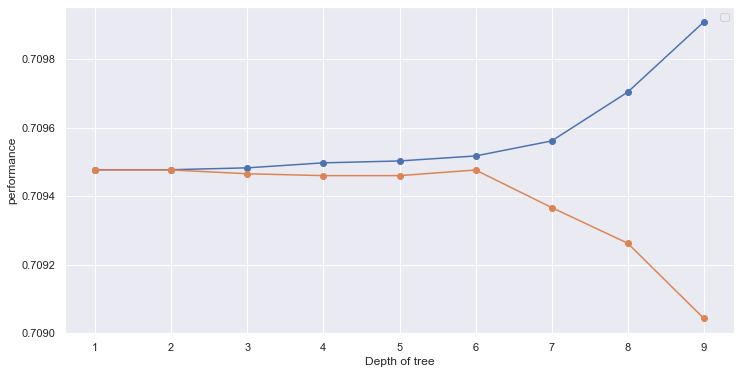

In [52]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o')
plt.plot(frame['max_depth'], frame['valid_acc'], marker='o')
plt.xlabel('Depth of tree')
plt.ylabel('performance')
plt.legend()

In [53]:
dt_model = DecisionTreeClassifier(max_depth=8, max_leaf_nodes=25, random_state=10)

In [54]:
#fitting the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, max_leaf_nodes=25, random_state=10)

In [55]:
#Training score
dt_model.score(X_train, y_train)

0.7094770136482892

In [56]:
#Validation score
dt_model.score(X_valid, y_valid)

0.7094762476757771

In [57]:
from sklearn import tree

In [58]:
!pip install graphviz

In [64]:
decision_tree = tree.export_graphviz(dt_model,out_file='tree.dot',feature_names=X_train.columns,max_depth=2,filled=True)

In [65]:
!dot -Tpng tree.dot -o tree.png

'dot' is not recognized as an internal or external command,
operable program or batch file.


In [66]:
image = plt.imread('tree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)

FileNotFoundError: [Errno 2] No such file or directory: 'tree.png'